In [ ]:
from __future__ import print_function # import the print function from future versions of Python (to ensure compatibility)

import keras # import the Keras library

from tensorflow.keras.datasets import mnist # import the MNIST dataset from TensorFlow.Keras
from tensorflow.keras.models import Sequential # import the Sequential model class from TensorFlow.Keras
from tensorflow.keras.layers import Dense, Dropout # import the Dense and Dropout layer classes from TensorFlow.Keras
from tensorflow.keras.optimizers import RMSprop # import the RMSprop optimizer class from TensorFlow.Keras
from tensorflow.keras import backend # import the backend module from TensorFlow.Keras

import tensorflow as tf # import the TensorFlow library
import numpy as np # import the NumPy library

from sklearn.model_selection import KFold, cross_val_score, train_test_split # import classes for cross-validation and train-test splitting from scikit-learn library
from keras.callbacks import ModelCheckpoint, EarlyStopping # import callback classes for model saving and early stopping from Keras


In [ ]:
# Load MNIST dataset and split it into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Concatenate the train and test sets into a single dataset
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

# Set the desired train set size
train_size = 0.5

# Split the concatenated dataset into train and test sets, based on the desired train set size
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

# Print the length (number of samples) in the train set
print(len(x_train))

# Reshape the train and test sets to match the expected input shape of the neural network
# The train and test sets are reshaped using the `reshape` function.
# This is done to match the expected input shape of the neural network model,
# which in this case is a flatten 28x28 image represented as a 784-dimensional vector.
x_train = x_train.reshape(35000, 784)
x_test = x_test.reshape(35000, 784)

# Convert the data type of the train and test sets to float32
# The data type of the train and test sets is converted to `float32`. 
# This is often necessary for numerical computations done in deep learning models.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the values in the train and test sets by dividing them by 255
# The values in the train and test sets are normalized by dividing them by 255. 
# This scales the pixel values from the original range of 0-255
# to a normalized range of 0-1, which can improve the performance of the neural network.
x_train /= 255
x_test /= 255

# Print the number of samples in the train and test sets
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


Certainly! Here are comments added to the code:

```python
batch_size = 128
```
- This line initializes a variable `batch_size` with a value of 128. The `batch_size` represents the number of samples that will be propagated through the neural network at once during training.

```python
num_classes = 10
```
- This line initializes a variable `num_classes` with a value of 10. The `num_classes` represents the total number of classes or categories in the dataset. In this case, there are 10 possible digits (0-9) in the MNIST dataset.

```python
epochs = 10
```
- This line initializes a variable `epochs` with a value of 10. The `epochs` represents the number of times the model will iterate over the entire dataset during training. Each iteration through the entire dataset is called an epoch.

These variables are commonly used hyperparameters that can be adjusted to optimize the performance of the neural network model.

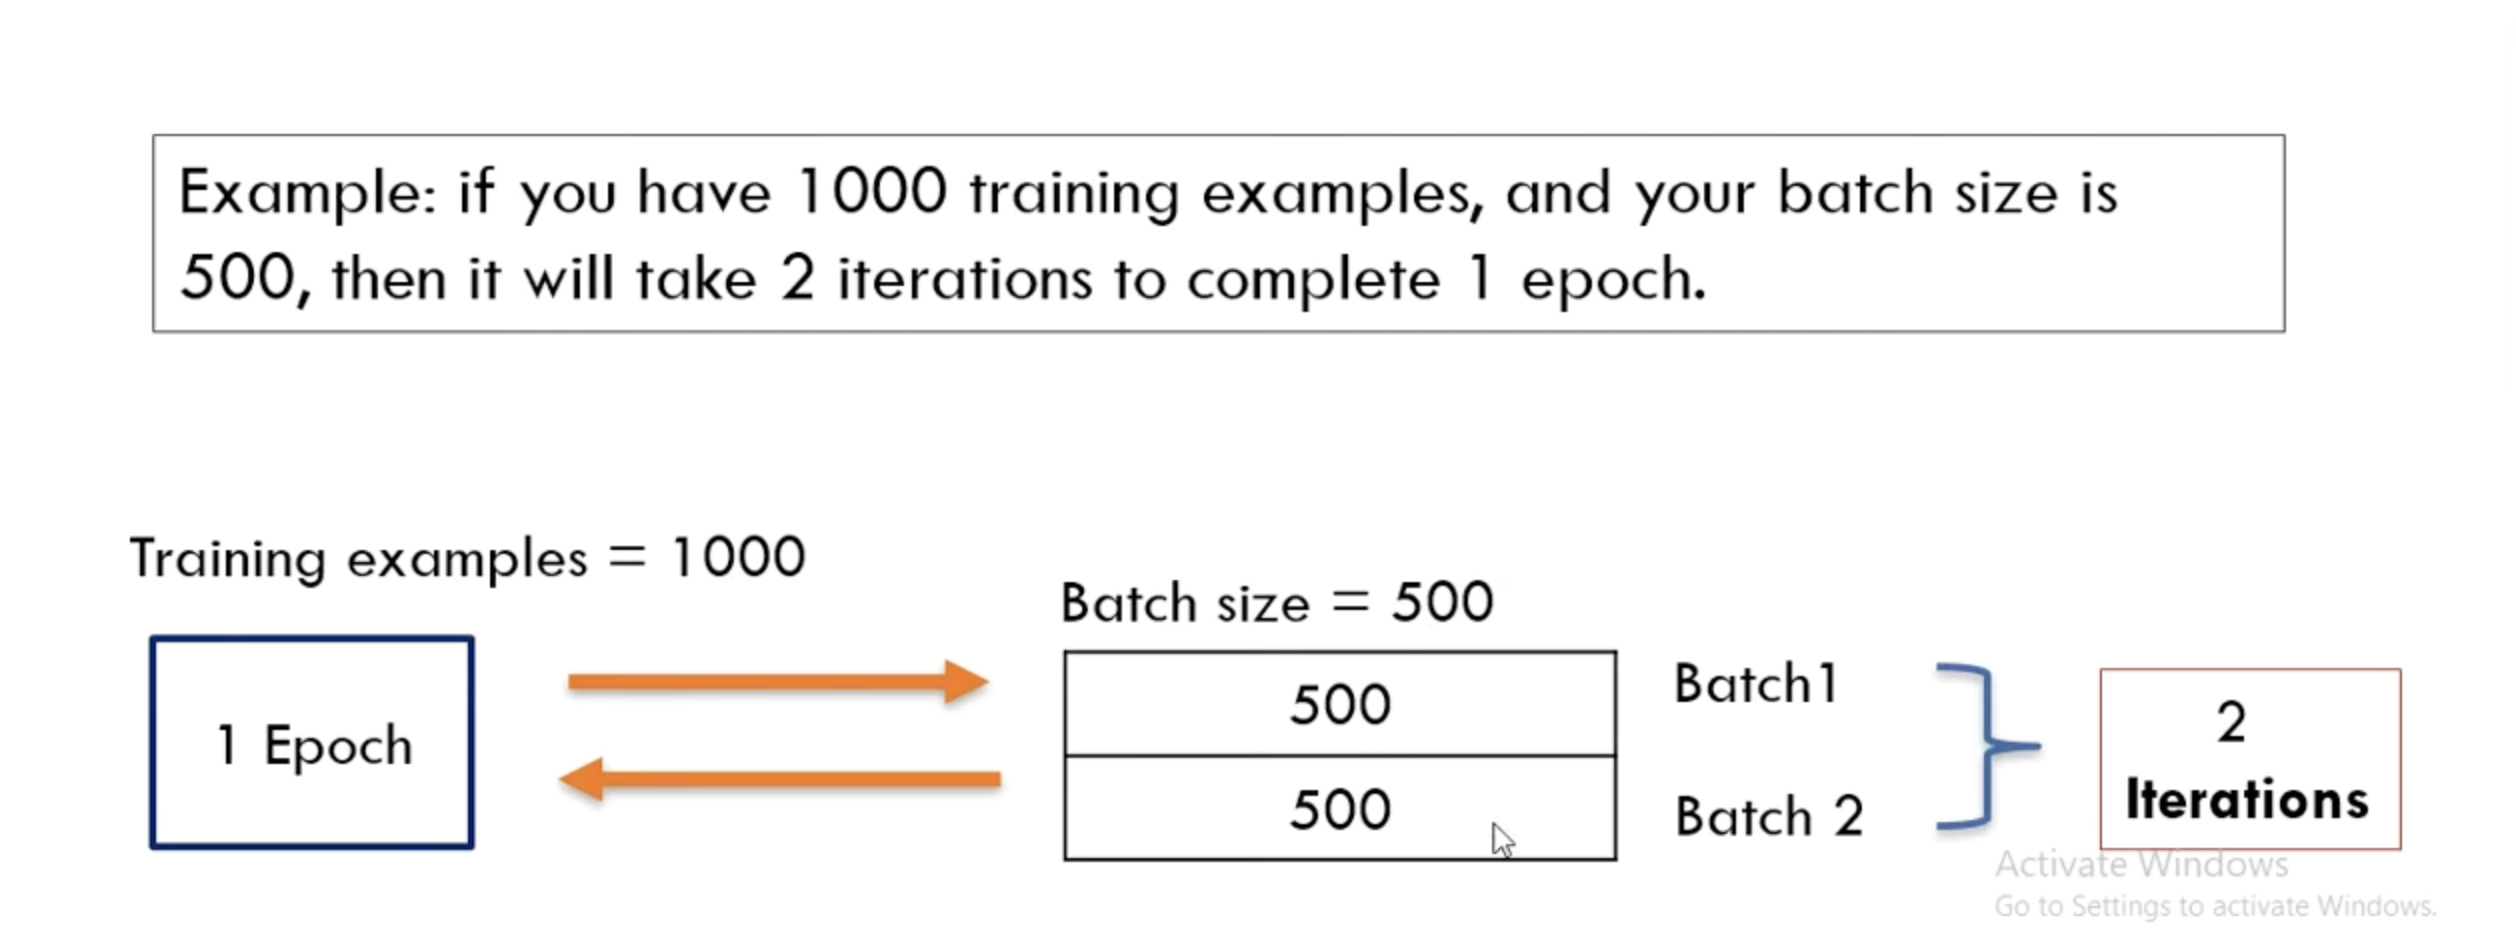

In [1]:
from IPython.display import Image
Image(filename='epochs-batchsize-iterations.png')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

In [ ]:
y_train[0]

In [ ]:
y_train

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

This code sets up a Sequential model in Keras, a popular deep learning library in Python. 

```python
model = Sequential()
```
- This line creates an instance of a Sequential model. The Sequential model allows us to build a neural network by stacking layers on top of each other.

```python
model.add(Dense(512, activation='relu', input_shape=(784,)))
```
- This line adds a Dense layer to the model with 512 units. The Dense layer is a fully connected layer, where each neuron is connected to every neuron in the previous layer. The `activation='relu'` argument specifies that the Rectified Linear Unit (ReLU) activation function should be used. The `input_shape=(784,)` argument defines the shape of the input to this layer. In this case, each input has a shape of (784,), which corresponds to a flattened image with 784 pixels.

```python
model.add(Dense(512, activation='relu'))
```
- This line adds another Dense layer to the model, also with 512 units and using the ReLU activation function. Since this is not the first layer in the model, it does not need the `input_shape` argument. The output of the previous layer automatically serves as the input for this layer.

```python
model.add(Dense(10, activation='softmax'))
```
- This line adds the final Dense layer to the model with 10 units. The activation function specified here is `softmax`, which is commonly used for multi-class classification problems. It outputs a probability distribution over the 10 possible classes.

In summary, the code builds a neural network model with three fully connected layers. The first two layers have 512 units each and use the ReLU activation function. The last layer has 10 units and uses the softmax activation function to produce probability values for each class.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# run me if you found "module 'tensorflow' has no attribute 'get_default_graph'" error
# !pip3 install tensorflow==1.13.1

The code `model.summary()` is used to display a summary of the model architecture. It provides a concise overview of the layers in the model, including the number of parameters and the output shape of each layer.

When you call `model.summary()`, it prints a table-like representation of the model architecture to the console. Here's an example of what the output might look like:

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
=================================================================
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
```

Let's break down the information provided by `model.summary()`:

- `Layer (type)`: This column lists the type of each layer in the model, such as Dense, Conv2D, etc.
- `Output Shape`: This column shows the shape of the output produced by each layer. For example, `(None, 512)` means that the output shape of the first layer is a tensor with dimensions `(batch_size, 512)`.
- `Param #`: This column represents the number of trainable parameters in each layer. Trainable parameters are the weights and biases that the model learns during training.
- `Total params`: This row shows the total number of trainable parameters in the entire model.
- `Trainable params`: This row specifies the number of trainable parameters in the model that will be updated during training.
- `Non-trainable params`: This row indicates the number of non-trainable parameters in the model, which are typically associated with pre-trained layers or fixed weights.

The `model.summary()` function is helpful for quickly understanding the structure of a neural network and checking the number of parameters involved.

In [ ]:
model.summary()

The code snippet `model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.03), metrics=['accuracy'])` is used to compile a model in Python using the Keras library.

Let's break down the different components of this code:

1. `loss='categorical_crossentropy'`: This specifies the loss function to be used during training. In this case, it is set to `'categorical_crossentropy'`, which is commonly used for multi-class classification problems. It measures the difference between the true labels and the predicted probabilities for each class.

2. `optimizer=RMSprop(learning_rate=0.03)`: This specifies the optimization algorithm to be used for training the model. In this case, we are using the RMSprop optimizer with a learning rate of 0.03. RMSprop is an optimization algorithm that adapts the learning rate based on the gradients of the parameters, helping to converge faster and handle sparse gradients better.

3. `metrics=['accuracy']`: This specifies the evaluation metric(s) to be used during training and testing. In this case, we are using the `'accuracy'` metric, which measures the proportion of correctly classified samples.

After calling `model.compile()`, the model is ready to be trained using the specified loss function, optimizer, and metrics.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.03),
              metrics=['accuracy'])

In [ ]:
# Train the model using the specified training data and labels
history = model.fit(x_train, y_train,
                    batch_size=batch_size,    # Size of the mini-batches used for gradient updates
                    epochs=10,                # Number of times the entire dataset will be iterated over during training
                    verbose=1,                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
                    validation_data=(x_test, y_test))  # Validation data to evaluate the model's performance on


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

### Using EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
del model

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.03),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2000,
                    verbose=1,
                    validation_data=(x_test, y_test),
                   callbacks=[EarlyStopping(min_delta=0,monitor='accuracy', mode='auto'
                                            ,patience=3)])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

### Load Model using Keras

In [ ]:
import tensorflow as tf 
model.save("mymodel.h5")

In [ ]:
loaded_model = tf.keras.models.load_model('mymodel.h5')

In [ ]:
loaded_score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('\nTest loss:', loaded_score[0])
print('Test accuracy:', loaded_score[1])